# ASSIGNMENT 4 
# MUSTAFA EMİR PEKER : 2200356011
# YUSUF KOCA : 2200356013

# PART 1

Here are the libraries that we used for part 1

In [27]:

import glob
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


The Vegetables dictionary maps each vegetable to an integer value, which is used to label the images of the vegetables when they are loaded into the program. The relu(), sigmoid(), and tanh() functions are all activation functions that can be applied to the output of a neural network layer. The relu_derivative(), sigmoid_derivative(), and tanh_derivative() functions are the derivatives of the corresponding activation functions, which can be used in the backpropagation process for training the neural network. The softmax() function is also an activation function, often used in the output layer of a classification neural network to produce probability-like values for each class. The oneHot() function converts a label vector to a one-hot encoded matrix. The loss_function() computes the negative log likelihood loss of the network's predictions given the true labels. The create_mini_batches() function divides the input data and labels into mini-batches, which can be used to train the network using stochastic gradient descent. The accuracy() function computes the proportion of correct predictions made by the network. Finally, the load_data() function reads in and processes image data from a given directory and returns a list of image data arrays.

In [28]:
Vegetables = {"Bean": 0 , "Bitter_Gourd": 1, "Bottle_Gourd": 2, "Brinjal": 3, "Broccoli": 4, "Cabbage": 5, "Capsicum": 6, "Carrot": 7, "Cauliflower": 8, "Cucumber": 9, "Papaya": 10, "Potato": 11, "Pumpkin": 12, "Radish": 13, "Tomato": 14}


def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    return sigmoid(Z) * (1 - sigmoid(Z))

def tanh(Z):
    return np.tanh(Z)

def tanh_derivative(Z):
    return 1 - np.power(tanh(Z), 2)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z))
    return expZ / expZ.sum(axis=0)

def oneHot(Y):
    one_hot_Y = np.zeros((15, Y.size))

    Y1 = Y.astype(int)

    for i in range(0, Y.size):
        one_hot_Y[Y1[i], i] = 1
    return one_hot_Y

#loss function negative log likelihood
def loss_function(A2, Y):
    m = Y.size
    one_hot_Y = oneHot(Y)
    loss = -1 / m * np.sum(one_hot_Y * np.log(A2))
    return loss

def create_mini_batches(X, Y, mini_batch_size):
    mini_batches = []

    # give me the number columns in X
    m = X.shape[1]

    number_of_mini_batches = m // mini_batch_size

    for i in range(number_of_mini_batches):
        mini_batch_X = X[:, i * mini_batch_size: (i+1) * mini_batch_size]
        mini_batch_Y = Y[(i * mini_batch_size): (i+1) * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # if there is a remainder
    if m % mini_batch_size != 0:
        mini_batch_X = X[:, number_of_mini_batches * mini_batch_size: m]
        mini_batch_Y = Y[ number_of_mini_batches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)



    return mini_batches

def accuracy(predictions, Y):
    return np.mean(predictions == Y)

def load_data(path, vegetable):
  # Get a list of all the image filenames
  filenames = glob.glob(path + '/*.jpg')

  # Initialize an empty list to store the images
  images = []

  # Loop over the filenames

  for filename in filenames:
    # take only 100 images

    # Open the image file
    im = Image.open(filename)

    # convert images to 60x60
    im = im.resize((60, 60))

    # Convert the image to a NumPy array
    image_data = np.array(im)

    #flatten the image
    image_data = image_data.flatten()


    # normalize image values
    image_data = image_data/255

    # append a label in front of the image
    ''' THERE MIGHT BE A PROBLEM HERE FOR LABELS. IT INSERTS AS A FLOAT.'''
    image_data = np.insert(image_data, 0, Vegetables[vegetable])




    # Add the image to the list of images
    images.append(image_data)

  # Convert the list of images to a NumPy array
  images = np.array(images)

  return images



This code defines a neural network with one hidden layer and no activation function. The network has a single layer with 15 units and takes in a matrix of input data, X, with dimensions (number of features, number of examples). The weights, W1, are initialized randomly using the randn function from NumPy and then scaled by 0.01. The biases, b1, are initialized as a column vector of zeros with 15 rows. The forward_propagation_0hidden function performs a forward pass through the network, computing the dot product of X and W1 and adding the biases b1 to the result. The output of the forward pass, A1, is then passed through the softmax function, which normalizes the values to sum to 1. The backward_propagation_tanh_0hidden, backward_propagation_relu_0hidden, and backward_propagation_sigmoid_0hidden functions compute the gradients of the cost function with respect to the weights and biases using backpropagation. The update_parameters_0hidden function updates the weights and biases using gradient descent. The predict_0hidden function makes predictions using the trained model. The gradient_descent_0hidden function combines all of these steps to train the model using mini-batch gradient descent. It iteratively performs the forward and backward passes, updates the weights and biases, and reduces the learning rate by a factor of 0.9905 every iteration.

In [29]:
'''0 hidden layer'''

def initParameters_0hidden():
    W1 = np.random.randn(15, 60*60*3) * 0.01
    b1 = np.zeros((15, 1))
    return W1, b1

def forward_propagation_0hidden(X, W1, b1):
    Z1 = W1.dot(X) + b1
    A1 = softmax(Z1)
    return Z1, A1

def backward_propagation_tanh_0hidden(Z1, A1, W1, X, Y):
    m = Y.size
    one_hot_Y = oneHot(Y)
    dZ1 = (A1 - one_hot_Y)
    dW1 = 1 / m * dZ1.dot(X.T)
    dB1 = 1 / m * np.sum(dZ1)
    return dW1, dB1

def backward_propagation_relu_0hidden(Z1, A1, W1, X, Y):
    m = Y.size
    one_hot_Y = oneHot(Y)
    dZ1 = (A1 - one_hot_Y)
    dW1 = 1 / m * dZ1.dot(X.T)
    dB1 = 1 / m * np.sum(dZ1)
    return dW1, dB1

def backward_propagation_sigmoid_0hidden(Z1, A1, W1, X, Y):
    m = Y.size
    one_hot_Y = oneHot(Y)
    dZ1 = 2 * (A1 - one_hot_Y)
    dW1 = 1 / m * dZ1.dot(X.T)
    dB1 = 1 / m * np.sum(dZ1)
    return dW1, dB1

def update_parameters_0hidden(W1, b1, dW1, dB1, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * dB1
    return W1, b1

def predict_0hidden(X, W1, b1):
    Z1, A1 = forward_propagation_0hidden(X, W1, b1)
    predictions = np.argmax(A1, axis=0)
    return predictions

def gradient_descent_0hidden(X, Y, learning_rate, mini_batch_size, num_iterations):
    W1, b1 = initParameters_0hidden()
    for i in range(0, num_iterations):
        mini_batches = create_mini_batches(X, Y, mini_batch_size)
        for mini_batch in mini_batches:
            (mini_batch_X, mini_batch_Y) = mini_batch
            Z1, A1 = forward_propagation_0hidden(mini_batch_X, W1, b1)
            dW1, dB1 = backward_propagation_tanh_0hidden(Z1, A1, W1, mini_batch_X, mini_batch_Y)
            W1, b1 = update_parameters_0hidden(W1, b1, dW1, dB1, learning_rate)

        learning_rate = learning_rate * 0.9905
    return W1, b1



The initParameters_1hidden() function initializes the weights and biases for the neural network, which will be randomly initialized with values drawn from a normal distribution with mean 0 and standard deviation 0.01. The forward_propagation_1hidden_relu(), forward_propagation_1hidden_tanh(), and forward_propagation_1hidden_sigmoid() functions perform the forward propagation step for the neural network, computing the activations of the hidden and output layers using the input data and the weights and biases of the network. The backward_propagation_tanh_1hidden(), backward_propagation_relu_1hidden(), and backward_propagation_sigmoid_1hidden() functions perform the backward propagation step, computing the gradients of the loss function with respect to the weights and biases using the activations of the hidden and output layers. The update_parameters_1hidden() function updates the weights and biases of the neural network using the computed gradients and a specified learning rate. The train_1hidden() function trains the neural network using the given input data and labels, using the specified number of epochs, mini-batch size, and learning rate. The predict_1hidden() function makes predictions for a given set of input data using the trained neural network. The plot_loss() function plots the loss of the neural network over the course of training.

In [30]:

''' 1 HIDDEN LAYER '''

def initParameters_1hidden():
    W1 = np.random.randn(1000, 60*60*3) * 0.01
    b1 = np.zeros((1000, 1))
    W2 = np.random.randn(15, 1000) * 0.01
    b2 = np.zeros((15, 1))
    return W1, b1, W2, b2


def forward_propagation_1hidden_relu(X, W1, b1, W2, b2):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def forward_propagation_1hidden_tanh(X, W1, b1, W2, b2):
    Z1 = W1.dot(X) + b1
    A1 = tanh(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def forward_propagation_1hidden_sigmoid(X, W1, b1, W2, b2):
    Z1 = W1.dot(X) + b1
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def backward_propagation_tanh_1hidden(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = oneHot(Y)
    dZ2 = (A2 - one_hot_Y)
    dW2 = 1 / m * dZ2.dot(A1.T)
    dB2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * tanh_derivative(Z1)

    dW1 = 1 / m * dZ1.dot(X.T)
    dB1 = 1 / m * np.sum(dZ1)

    return dW1, dB1, dW2, dB2


def backward_propagation_relu_1hidden(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = oneHot(Y)
    dZ2 = 2 * (A2 - one_hot_Y)
    dW2 = 1 / m * dZ2.dot(A1.T)
    dB2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * relu_derivative(Z1)

    dW1 = 1 / m * dZ1.dot(X.T)
    dB1 = 1 / m * np.sum(dZ1)

    return dW1, dB1, dW2, dB2


def backward_propagation_sigmoid_1hidden(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = oneHot(Y)
    dZ2 = 2 * (A2 - one_hot_Y)
    dW2 = 1 / m * dZ2.dot(A1.T)
    dB2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * sigmoid_derivative(Z1)

    dW1 = 1 / m * dZ1.dot(X.T)
    dB1 = 1 / m * np.sum(dZ1)

    return dW1, dB1, dW2, dB2


def update_parameters_1hidden(W1, b1, W2, b2, dW1, dB1, dW2, dB2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * dB1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * dB2
    return W1, b1, W2, b2


def predict_1hidden_relu(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = forward_propagation_1hidden_relu(X, W1, b1, W2, b2)
    predictions = np.argmax(A2, axis=0)
    return predictions

def predict_1hidden_tanh(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = forward_propagation_1hidden_tanh(X, W1, b1, W2, b2)
    predictions = np.argmax(A2, axis=0)
    return predictions

def predict_1hidden_sigmoid(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = forward_propagation_1hidden_sigmoid(X, W1, b1, W2, b2)
    predictions = np.argmax(A2, axis=0)
    return predictions



def gradient_descent_relu_1hidden(X, Y, learning_rate, num_iterations, mini_batch_size):
    W1, b1, W2, b2 = initParameters_1hidden()
    for i in range(0, num_iterations):
        mini_batches = create_mini_batches(X, Y, mini_batch_size)
        for mini_batch in mini_batches:
            (mini_batch_X, mini_batch_Y) = mini_batch
            Z1, A1, Z2, A2 = forward_propagation_1hidden_relu(mini_batch_X, W1, b1, W2, b2)
            dW1, dB1, dW2, dB2 = backward_propagation_relu_1hidden(Z1, A1, Z2, A2, W1, W2, mini_batch_X, mini_batch_Y)
            W1, b1, W2, b2 = update_parameters_1hidden(W1, b1, W2, b2, dW1, dB1, dW2, dB2, learning_rate)

        learning_rate = learning_rate * 0.992


    return W1, b1, W2, b2


def gradient_descent_sigmoid_1hidden(X, Y, learning_rate, num_iterations, mini_batch_size):
    W1, b1, W2, b2 = initParameters_1hidden()
    for i in range(0, num_iterations):
        mini_batches = create_mini_batches(X, Y, mini_batch_size)
        for mini_batch in mini_batches:
            (mini_batch_X, mini_batch_Y) = mini_batch
            Z1, A1, Z2, A2 = forward_propagation_1hidden_sigmoid(mini_batch_X, W1, b1, W2, b2)
            dW1, dB1, dW2, dB2 = backward_propagation_sigmoid_1hidden(Z1, A1, Z2, A2, W1, W2, mini_batch_X, mini_batch_Y)
            W1, b1, W2, b2 = update_parameters_1hidden(W1, b1, W2, b2, dW1, dB1, dW2, dB2, learning_rate)

        learning_rate = learning_rate * 0.992

    return W1, b1, W2, b2


def gradient_descent_tanh_1hidden(X, Y, learning_rate, num_iterations, mini_batch_size):
    W1, b1, W2, b2 = initParameters_1hidden()
    for i in range(0, num_iterations):
        mini_batches = create_mini_batches(X, Y, mini_batch_size)
        for mini_batch in mini_batches:
            (mini_batch_X, mini_batch_Y) = mini_batch
            Z1, A1, Z2, A2 = forward_propagation_1hidden_tanh(mini_batch_X, W1, b1, W2, b2)
            dW1, dB1, dW2, dB2 = backward_propagation_tanh_1hidden(Z1, A1, Z2, A2, W1, W2, mini_batch_X, mini_batch_Y)
            W1, b1, W2, b2 = update_parameters_1hidden(W1, b1, W2, b2, dW1, dB1, dW2, dB2, learning_rate)

        learning_rate = learning_rate * 0.9905

    return W1, b1, W2, b2



The code we provided is for training a neural network model with two hidden layers. The model has three layers in total: an input layer, two hidden layers, and an output layer. The input layer has 60603 units, corresponding to the three color channels (red, green, and blue) of a 60x60 pixel image. The output layer has 15 units, corresponding to the 15 different classes the model is trying to classify the input image into.

The model uses three different activation functions: ReLU (Rectified Linear Unit), sigmoid, and tanh. The activation function is applied element-wise to the output of each layer. ReLU returns the input if it is positive, and returns 0 if it is negative. The sigmoid function maps the input to the range [0, 1]. The tanh function maps the input to the range [-1, 1].

The model also has three sets of weights and biases, one for each layer. The weights and biases are initialized with random values from a normal distribution with mean 0 and standard deviation 0.01. The weights and biases are updated during training using gradient descent, with the gradients computed using backpropagation.

The code defines three functions for forward propagation, one for each activation function. These functions take in the input image and the weights and biases, and return the output of each layer and the final prediction of the model.

The code also defines three functions for backward propagation, one for each activation function. These functions take in the output of each layer, the weights and biases, the input image, and the true label, and return the gradients of the weights and biases with respect to the loss.


In [31]:

''' 2  hidden layers  '''

def initParameters_2hidden(label):
    if (label == 'relu'):
        # he initialization
        W1 = np.random.randn(1000, 60 * 60 * 3) * np.sqrt(2 / (60 * 60 * 3))
        b1 = np.zeros((1000, 1))
        W2 = np.random.randn(1000, 1000) * np.sqrt(2 / 1000)
        b2 = np.zeros((1000, 1))
        W3 = np.random.randn(15, 1000) * np.sqrt(2 / 1000)
        b3 = np.zeros((15, 1))
    elif (label == 'tanh'):
        # xavier initialization
        W1 = np.random.randn(1000, 60 * 60 * 3) * np.sqrt(1 / (60 * 60 * 3))
        b1 = np.zeros((1000, 1))
        W2 = np.random.randn(1000, 1000) * np.sqrt(1 / 1000)
        b2 = np.zeros((1000, 1))
        W3 = np.random.randn(15, 1000) * np.sqrt(1 / 1000)
        b3 = np.zeros((15, 1))

    else:
        # xavier initialization
        W1 = np.random.randn(1000, 60 * 60 * 3) * np.sqrt(1 / (60 * 60 * 3))
        b1 = np.zeros((1000, 1))
        W2 = np.random.randn(1000, 1000) * np.sqrt(1 / 1000)
        b2 = np.zeros((1000, 1))
        W3 = np.random.randn(15, 1000) * np.sqrt(1 / 1000)
        b3 = np.zeros((15, 1))



    return W1, b1, W2, b2, W3, b3


def forward_propagation_2hidden_relu(X, W1, b1, W2, b2, W3, b3):
    # use relu activation function
    Z1 = W1.dot(X) + b1
    A1 = np.maximum(0, Z1)
    Z2 = W2.dot(A1) + b2
    A2 = np.maximum(0, Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)

    return Z1, A1, Z2, A2, Z3, A3


def forward_propagation_2hidden_sigmoid(X, W1, b1, W2, b2, W3, b3):
    # use sigmoid activation function
    Z1 = W1.dot(X) + b1
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)

    return Z1, A1, Z2, A2, Z3, A3


def forward_propagation_2hidden_tanh(X, W1, b1, W2, b2, W3, b3):
    # use tanh activation function
    Z1 = W1.dot(X) + b1
    A1 = np.tanh(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = np.tanh(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)

    return Z1, A1, Z2, A2, Z3, A3


def backward_propagation_relu_2hidden(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    m = X.shape[1]
    dZ3 = A3 - Y
    dW3 = (1 / m) * dZ3.dot(A2.T)
    dB3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = W3.T.dot(dZ3)
    dZ2 = np.array(dA2, copy=True)
    dZ2[Z2 <= 0] = 0
    dW2 = (1 / m) * dZ2.dot(A1.T)
    dB2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = W2.T.dot(dZ2)
    dZ1 = np.array(dA1, copy=True)
    dZ1[Z1 <= 0] = 0
    dW1 = (1 / m) * dZ1.dot(X.T)
    dB1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    # gradient clipping for normalizied
    dW1 = np.clip(dW1, -1, 1)
    dW2 = np.clip(dW2, -1, 1)
    dW3 = np.clip(dW3, -1, 1)




    return dW1, dB1, dW2, dB2, dW3, dB3


def backward_propagation_sigmoid_2hidden(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    m = X.shape[1]
    dZ3 = A3 - Y
    dW3 = (1 / m) * dZ3.dot(A2.T)
    dB3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = W3.T.dot(dZ3)
    dZ2 = dA2 * sigmoid(Z2) * (1 - sigmoid(Z2))
    dW2 = (1 / m) * dZ2.dot(A1.T)
    dB2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = W2.T.dot(dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1 / m) * dZ1.dot(X.T)
    dB1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, dB1, dW2, dB2, dW3, dB3


def backward_propagation_tanh_2hidden(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    m = X.shape[1]
    dZ3 = A3 - Y
    dW3 = (1 / m) * dZ3.dot(A2.T)
    dB3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = W3.T.dot(dZ3)
    dZ2 = dA2 * (1 - np.power(tanh(Z2), 2))
    dW2 = (1 / m) * dZ2.dot(A1.T)
    dB2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = W2.T.dot(dZ2)
    dZ1 = dA1 * (1 - np.power(tanh(Z1), 2))
    dW1 = (1 / m) * dZ1.dot(X.T)
    dB1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, dB1, dW2, dB2, dW3, dB3


def update_parameters_2hidden(W1, b1, W2, b2, W3, b3, dW1, dB1, dW2, dB2, dW3, dB3, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * dB1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * dB2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * dB3

    return W1, b1, W2, b2, W3, b3


def predict_2hidden_relu(X, W1, b1, W2, b2, W3, b3):
    Z1, A1, Z2, A2, Z3, A3 = forward_propagation_2hidden_relu(X, W1, b1, W2, b2, W3, b3)
    predictions = np.argmax(A3, axis=0)

    return predictions


def predict_2hidden_sigmoid(X, W1, b1, W2, b2, W3, b3):
    Z1, A1, Z2, A2, Z3, A3 = forward_propagation_2hidden_sigmoid(X, W1, b1, W2, b2, W3, b3)
    predictions = np.argmax(A3, axis=0)

    return predictions


def predict_2hidden_tanh(X, W1, b1, W2, b2, W3, b3):
    Z1, A1, Z2, A2, Z3, A3 = forward_propagation_2hidden_tanh(X, W1, b1, W2, b2, W3, b3)
    predictions = np.argmax(A3, axis=0)

    return predictions




def gradient_descent_relu_2hidden(X, Y, learning_rate, num_iterations, minibatch_size):
    costs = []
    W1, b1, W2, b2, W3, b3 = initParameters_2hidden('relu')
    for i in range(num_iterations):
        minibatches = create_mini_batches(X, Y, minibatch_size)
        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            Z1, A1, Z2, A2, Z3, A3 = forward_propagation_2hidden_relu(minibatch_X, W1, b1, W2, b2, W3, b3)
            dW1, dB1, dW2, dB2, dW3, dB3 = backward_propagation_relu_2hidden(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, minibatch_X, minibatch_Y)
            W1, b1, W2, b2, W3, b3 = update_parameters_2hidden(W1, b1, W2, b2, W3, b3, dW1, dB1, dW2, dB2, dW3, dB3, learning_rate)

        learning_rate = learning_rate * 0.9905

    return W1, b1, W2, b2, W3, b3


def gradient_descent_sigmoid_2hidden(X, Y, learning_rate, num_iterations, minibatch_size):
    costs = []
    W1, b1, W2, b2, W3, b3 = initParameters_2hidden('sigmoid')
    for i in range(num_iterations):
        minibatches = create_mini_batches(X, Y, minibatch_size)
        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            Z1, A1, Z2, A2, Z3, A3 = forward_propagation_2hidden_sigmoid(minibatch_X, W1, b1, W2, b2, W3, b3)
            dW1, dB1, dW2, dB2, dW3, dB3 = backward_propagation_sigmoid_2hidden(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, minibatch_X, minibatch_Y)
            W1, b1, W2, b2, W3, b3 = update_parameters_2hidden(W1, b1, W2, b2, W3, b3, dW1, dB1, dW2, dB2, dW3, dB3, learning_rate)

        learning_rate = learning_rate * 0.9905

    return W1, b1, W2, b2, W3, b3


def gradient_descent_tanh_2hidden(X, Y, learning_rate, num_iterations, minibatch_size):
    costs = []
    W1, b1, W2, b2, W3, b3 = initParameters_2hidden('tanh')
    for i in range(num_iterations):
        minibatches = create_mini_batches(X, Y, minibatch_size)
        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            Z1, A1, Z2, A2, Z3, A3 = forward_propagation_2hidden_tanh(minibatch_X, W1, b1, W2, b2, W3, b3)
            dW1, dB1, dW2, dB2, dW3, dB3 = backward_propagation_tanh_2hidden(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, minibatch_X, minibatch_Y)
            W1, b1, W2, b2, W3, b3 = update_parameters_2hidden(W1, b1, W2, b2, W3, b3, dW1, dB1, dW2, dB2, dW3, dB3, learning_rate)

        learning_rate = learning_rate * 0.9905

    return W1, b1, W2, b2, W3, b3



This code is loading and concatenating a set of images for training and testing a machine learning model. The images are stored in folders with names corresponding to their labels (e.g., "Bean", "Bitter_Gourd", etc.). The images are loaded using a function called load_data, which appears to take in a file path and label as input, and returns the images as a NumPy array. The images are then concatenated along the first axis (axis=0) and shuffled randomly using the shuffle function from NumPy. The resulting array is then transposed and split into training data (X_train) and labels (Y_train). The same process is repeated for the test data.

In [32]:


# load data
BeanImages = load_data('Vegetable Images/train/Bean', 'Bean')
Bitter_GourdImages = load_data('Vegetable Images/train/Bitter_Gourd', 'Bitter_Gourd')
Bottle_GourdImages = load_data('Vegetable Images/train/Bottle_Gourd', 'Bottle_Gourd')
BrinjalImages = load_data('Vegetable Images/train/Brinjal', 'Brinjal')
BroccoliImages = load_data('Vegetable Images/train/Broccoli', 'Broccoli')
CabbageImages = load_data('Vegetable Images/train/Cabbage', 'Cabbage')
CapsicumImages = load_data('Vegetable Images/train/Capsicum', 'Capsicum')
CarrotImages = load_data('Vegetable Images/train/Carrot', 'Carrot')
CauliflowerImages = load_data('Vegetable Images/train/Cauliflower', 'Cauliflower')
CucumberImages = load_data('Vegetable Images/train/Cucumber', 'Cucumber')
PapayaImages = load_data('Vegetable Images/train/Papaya', 'Papaya')
PotatoImages = load_data('Vegetable Images/train/Potato', 'Potato')
PumpkinImages = load_data('Vegetable Images/train/Pumpkin', 'Pumpkin')
RadishImages = load_data('Vegetable Images/train/Radish', 'Radish')
TomatoImages = load_data('Vegetable Images/train/Tomato', 'Tomato')

# combine all the data


allTrainImages = np.concatenate((BeanImages, Bitter_GourdImages, Bottle_GourdImages, BrinjalImages
                                 , BroccoliImages, CabbageImages, CapsicumImages, CarrotImages, CauliflowerImages
                                 , CucumberImages, PapayaImages, PotatoImages, PumpkinImages, RadishImages
                                 , TomatoImages), axis=0)


m , n = allTrainImages.shape

# shuffle the data
np.random.shuffle(allTrainImages)

allTrainImages = allTrainImages.T
Y_train = allTrainImages[0]
# make all the labels to be int type
Y_train = Y_train.astype(int)
X_train = allTrainImages[1:n]



# load test data
BeanImages1 = load_data('Vegetable Images/test/Bean', 'Bean')
Bitter_GourdImages1 = load_data('Vegetable Images/test/Bitter_Gourd', 'Bitter_Gourd')
Bottle_GourdImages1 = load_data('Vegetable Images/test/Bottle_Gourd', 'Bottle_Gourd')
BrinjalImages1 = load_data('Vegetable Images/test/Brinjal', 'Brinjal')
BroccoliImages1 = load_data('Vegetable Images/test/Broccoli', 'Broccoli')
CabbageImages1 = load_data('Vegetable Images/test/Cabbage', 'Cabbage')
CapsicumImages1 = load_data('Vegetable Images/test/Capsicum', 'Capsicum')
CarrotImages1 = load_data('Vegetable Images/test/Carrot', 'Carrot')
CauliflowerImages1 = load_data('Vegetable Images/test/Cauliflower', 'Cauliflower')
CucumberImages1 = load_data('Vegetable Images/test/Cucumber', 'Cucumber')
PapayaImages1 = load_data('Vegetable Images/test/Papaya', 'Papaya')
PotatoImages1 = load_data('Vegetable Images/test/Potato', 'Potato')
PumpkinImages1 = load_data('Vegetable Images/test/Pumpkin', 'Pumpkin')
RadishImages1 = load_data('Vegetable Images/test/Radish', 'Radish')
TomatoImages1 = load_data('Vegetable Images/test/Tomato', 'Tomato')

# combine all the data
allTestImages = np.concatenate((BeanImages1, Bitter_GourdImages1, Bottle_GourdImages1, BrinjalImages1
                                    , BroccoliImages1, CabbageImages1, CapsicumImages1, CarrotImages1, CauliflowerImages1
                                    , CucumberImages1, PapayaImages1, PotatoImages1, PumpkinImages1, RadishImages1
                                    , TomatoImages1), axis=0)

m1 , n1 = allTestImages.shape

# shuffle the data
np.random.shuffle(allTestImages)

allTestImages = allTestImages.T
Y_test = allTestImages[0]
# make all the labels to be int type
Y_test = Y_test.astype(int)
X_test = allTestImages[1:n1]

# laod validation data
BeanImages2 = load_data('Vegetable Images/validation/Bean', 'Bean')
Bitter_GourdImages2 = load_data('Vegetable Images/validation/Bitter_Gourd', 'Bitter_Gourd')
Bottle_GourdImages2 = load_data('Vegetable Images/validation/Bottle_Gourd', 'Bottle_Gourd')
BrinjalImages2 = load_data('Vegetable Images/validation/Brinjal', 'Brinjal')
BroccoliImages2 = load_data('Vegetable Images/validation/Broccoli', 'Broccoli')
CabbageImages2 = load_data('Vegetable Images/validation/Cabbage', 'Cabbage')
CapsicumImages2 = load_data('Vegetable Images/validation/Capsicum', 'Capsicum')
CarrotImages2 = load_data('Vegetable Images/validation/Carrot', 'Carrot')
CauliflowerImages2 = load_data('Vegetable Images/validation/Cauliflower', 'Cauliflower')
CucumberImages2 = load_data('Vegetable Images/validation/Cucumber', 'Cucumber')
PapayaImages2 = load_data('Vegetable Images/validation/Papaya', 'Papaya')
PotatoImages2 = load_data('Vegetable Images/validation/Potato', 'Potato')
PumpkinImages2 = load_data('Vegetable Images/validation/Pumpkin', 'Pumpkin')
RadishImages2 = load_data('Vegetable Images/validation/Radish', 'Radish')
TomatoImages2 = load_data('Vegetable Images/validation/Tomato', 'Tomato')

# combine all the data
allValidationImages = np.concatenate((BeanImages2, Bitter_GourdImages2, Bottle_GourdImages2, BrinjalImages2
                                    , BroccoliImages2, CabbageImages2, CapsicumImages2, CarrotImages2, CauliflowerImages2
                                    , CucumberImages2, PapayaImages2, PotatoImages2, PumpkinImages2, RadishImages2
                                    , TomatoImages2), axis=0)

m2 , n2 = allValidationImages.shape

# shuffle the data
np.random.shuffle(allValidationImages)

allValidationImages = allValidationImages.T
Y_validation = allValidationImages[0]
X_validation = allValidationImages[1:n2]

Y_validation = Y_validation.astype(int)


# start from the 0 hidden layer try all the combinations for tanh and relu and sigmoid
# then try 1 hidden layer with all the combinations
# then try 2 hidden layer with all the combinations

zero_hidden_layer = []
one_hidden_layer = []
two_hidden_layer = []

batch_size = [32, 64, 128]


W1_0hidden, b1_hidden  = gradient_descent_0hidden(X_train, Y_train, 0.02, 3, 64)

predictions_0hidden = predict_0hidden(X_test,W1_0hidden,b1_hidden)
accur = np.mean(predictions_0hidden == Y_test)

# all the activation functions are the same because there is only 1 layer and it is the output layer
zero_hidden_layer.append(accur)
zero_hidden_layer.append(accur)
zero_hidden_layer.append(accur)

# one hidden layer
W1_1hidden_tanh, b1_1hidden_tanh, W2_1hidden_tanh, b2_1hidden_tanh = gradient_descent_tanh_1hidden(X_train, Y_train, 0.02, 3, 64)
W1_1hidden_relu, b1_1hidden_relu, W2_1hidden_relu, b2_1hidden_relu = gradient_descent_relu_1hidden(X_train, Y_train, 0.02, 3, 64)
W1_1hidden_sigmoid, b1_1hidden_sigmoid, W2_1hidden_sigmoid, b2_1hidden_sigmoid = gradient_descent_sigmoid_1hidden(X_train, Y_train, 0.02, 3, 64)

predictions_1hidden_tanh = predict_1hidden_tanh(X_test,W1_1hidden_tanh, b1_1hidden_tanh, W2_1hidden_tanh, b2_1hidden_tanh)
predictions_1hidden_relu = predict_1hidden_relu(X_test,W1_1hidden_relu, b1_1hidden_relu, W2_1hidden_relu, b2_1hidden_relu)
predictions_1hidden_sigmoid = predict_1hidden_sigmoid(X_test,W1_1hidden_sigmoid, b1_1hidden_sigmoid, W2_1hidden_sigmoid, b2_1hidden_sigmoid)

accur_tanh_1hidden = np.mean(predictions_1hidden_tanh == Y_test)
accur_relu_1hidden = np.mean(predictions_1hidden_relu == Y_test)
accur_sigmoid_1hidden = np.mean(predictions_1hidden_sigmoid == Y_test)

one_hidden_layer.append(accur_tanh_1hidden)
one_hidden_layer.append(accur_relu_1hidden)
one_hidden_layer.append(accur_sigmoid_1hidden)

# two hidden layer
W1_2hidden_tanh, b1_2hidden_tanh, W2_2hidden_tanh, b2_2hidden_tanh, W3_2hidden_tanh, b3_2hidden_tanh = gradient_descent_tanh_2hidden(X_train, Y_train, 0.02, 3, 64)
W1_2hidden_relu, b1_2hidden_relu, W2_2hidden_relu, b2_2hidden_relu, W3_2hidden_relu, b3_2hidden_relu = gradient_descent_relu_2hidden(X_train, Y_train, 0.02, 3, 64)
W1_2hidden_sigmoid, b1_2hidden_sigmoid, W2_2hidden_sigmoid, b2_2hidden_sigmoid, W3_2hidden_sigmoid, b3_2hidden_sigmoid = gradient_descent_sigmoid_2hidden(X_train, Y_train, 0.02, 3, 64)

predictions_2hidden_tanh = predict_2hidden_tanh(X_test,W1_2hidden_tanh, b1_2hidden_tanh, W2_2hidden_tanh, b2_2hidden_tanh, W3_2hidden_tanh, b3_2hidden_tanh)
predictions_2hidden_relu = predict_2hidden_relu(X_test,W1_2hidden_relu, b1_2hidden_relu, W2_2hidden_relu, b2_2hidden_relu, W3_2hidden_relu, b3_2hidden_relu)
predictions_2hidden_sigmoid = predict_2hidden_sigmoid(X_test,W1_2hidden_sigmoid, b1_2hidden_sigmoid, W2_2hidden_sigmoid, b2_2hidden_sigmoid, W3_2hidden_sigmoid, b3_2hidden_sigmoid)

accur_tanh_2hidden = np.mean(predictions_2hidden_tanh == Y_test)
accur_relu_2hidden = np.mean(predictions_2hidden_relu == Y_test)
accur_sigmoid_2hidden = np.mean(predictions_2hidden_sigmoid == Y_test)

two_hidden_layer.append(accur_tanh_2hidden)
two_hidden_layer.append(accur_relu_2hidden)
two_hidden_layer.append(accur_sigmoid_2hidden)

# pandas dataframe to store the results zero hidden layer, one hidden layer, two hidden layer are the rows
# tanh, relu, sigmoid are the columns

data = {'tanh': zero_hidden_layer, 'relu': one_hidden_layer, 'sigmoid': two_hidden_layer}
df = pd.DataFrame(data, index=['0 hidden layer', '1 hidden layer', '2 hidden layer'])
print(df)






/var/folders/dj/zhk2_dsj4552_l5f6_bbh4h00000gn/T/ipykernel_10093/3474462140.py:24: RuntimeWarning: invalid value encountered in true_divide
  return expZ / expZ.sum(axis=0)


                 tanh      relu   sigmoid
0 hidden layer  0.528  0.457000  0.073000
1 hidden layer  0.528  0.405000  0.066667
2 hidden layer  0.528  0.357667  0.077667


These results suggest that increasing the number of hidden layers and using the relu activation function may improve the classification accuracy of the neural network. However, it is important to note that the results may be different if the model was trained for more epochs due to hardware limitations.

It is not uncommon for different activation functions to require different initialization techniques. For example, the relu activation function can suffer from the "dying relu" problem, where the activations of some units become zero and remain zero during training. To address this issue, it is sometimes recommended to initialize the weights of relu units with small positive values (e.g., 0.01) to ensure that the activations are positive and non-zero. On the other hand, the tanh activation function has a mean of 0 and a range of [-1, 1], so it is often initialized with small random values around 0. The initialization method chosen can have a significant impact on the performance of the model, so it is important to choose an appropriate initialization method for the chosen activation function. Because of that we implemented different initialization techniques. 

# Part2

First we import all the necessary libraries for this part.

In [1]:
#imports required for the project
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import warnings
from torchvision.models import VGG19_Weights
from sklearn.metrics import f1_score, precision_score, recall_score

initialize_dataloader function gets the images from the directory and creates a dataset and dataloader to use in our project.

In [2]:
#function to create dataset and dataloader for the project
def initialize_dataloader(input_size, data_dir):
    # Data augmentation and normalization for training
    data_transforms = {
        "train": transforms.Compose([
            transforms.RandomResizedCrop(input_size),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        "validation": transforms.Compose([
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),

        "test": transforms.Compose([
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    print("Creating Datasets and Dataloaders...")
    print("-" * 20)

    # Create training, validation and test datasets
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in
                      ["train", "validation", "test"]}
    # Create training, validation and test dataloaders
    dataloaders_dict = {
        x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in
        ["train", "validation", "test"]}

    print(image_datasets)

    return dataloaders_dict

initialize_model function creates a pretrained vgg19 model that fits to our dataset. set_parameter_requires_grad is a helping function to initialize_model function. It sets requires_grad values of params that will get finetuned to true and rest false.

In [3]:
#function that sets which parameters to get finetuned by making their require_grad True and rest False
def set_parameter_requires_grad(model, feature_extract):

    params_to_update = model.parameters()
    params_to_update_names = []

    #only last 2 connected layers
    if feature_extract:
        params_to_update = []
        for name, param in model.named_parameters():
            if name == "classifier.3.weight" or name == "classifier.3.bias" or name == "classifier.6.weight" or name == "classifier.6.bias":
                param.requires_grad = True
            else:
                param.requires_grad = False
            if param.requires_grad == True:
                params_to_update.append(param)
                params_to_update_names.append(name)
    #all layers            
    else:
        for name, param in model.named_parameters():
            if param.requires_grad == True:
                params_to_update_names.append(name)

    return params_to_update, params_to_update_names

#creating a vgg19 model that fits for our project
def initialize_model(num_classes, feature_extract):

    print("Initializing VGG19 Model")
    print('-' * 10)

    model_ft = models.vgg19(weights=VGG19_Weights.DEFAULT)
    params_to_update, params_to_update_names = set_parameter_requires_grad(model_ft, feature_extract)
    num_ftrs = model_ft.classifier[6].in_features
    model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)

    return model_ft, params_to_update, params_to_update_names

train_model function optimizes our pretrained model with the train data then tests it with validation and test datas. It gives the optimized model and lists of lists for train, validation and test data. Each of these lists includes accuracy, precision, recall and f1_score values for respective datasets for each epoch.

In [4]:
#function that trains, optimizes and test the model
def train_model(model, dataloaders, criterion, optimizer, num_epochs):
    since = time.time()

    train_acc_history = [[], [], [], []]
    val_acc_history = [[], [], [], []]
    test_acc_history = [[], [], [], []]

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        if (epoch+1)%10 == 1:
            print("Epoch {}/{}".format(epoch+1, num_epochs))
            print("-" * 20)

        # Each epoch has a training and validation phase
        for phase in ["train", "validation", "test"]:
            if phase == "train":
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == "train"):
                    # Get model outputs and calculate loss
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)


            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            precision = precision_score(labels.cpu().data, preds.cpu(), average= "weighted")
            recall = recall_score(labels.cpu().data, preds.cpu(), average= "weighted")
            f1 = f1_score(labels.cpu().data, preds.cpu(), average= "weighted")


            if (epoch+1)%10 == 1:
                print("{} Loss: {:.4f} Acc: {:.4f} Prec: {:.4f} Rec: {:.4f} F1: {:.4f}".format(phase, epoch_loss, epoch_acc, precision, recall, f1))
                print()
                
            # deep copy the model
            if phase == "validation" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == "train":
                train_acc_history[0].append(epoch_acc)
                train_acc_history[1].append(precision)
                train_acc_history[2].append(recall)
                train_acc_history[3].append(f1)
            if phase == "validation":
                val_acc_history[0].append(epoch_acc)
                val_acc_history[1].append(precision)
                val_acc_history[2].append(recall)
                val_acc_history[3].append(f1)
            if phase == "validation":
                test_acc_history[0].append(epoch_acc)
                test_acc_history[1].append(precision)
                test_acc_history[2].append(recall)
                test_acc_history[3].append(f1)

        
    time_elapsed = time.time() - since
    print("Training complete in {:.0f}m {:.0f}s".format(time_elapsed // 60, time_elapsed % 60))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model,train_acc_history ,val_acc_history, test_acc_history

Initializing fixed variables that will be used throughout the code and setting device to gpu if available.

In [5]:
if __name__ ==  "__main__":
    warnings.filterwarnings("ignore")

    #fixed variables that will be used in many areas of the code
    data_dir = "./Vegetable Images"
    num_classes = 15
    batch_size = 100
    num_epochs = 51
    input_size = 56

    # Detect if we have a GPU available
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Creating the dataloader and printing its details. As we can see we have 15000 pictures for train, 3000 for validation and 3000 for test data. I also resized the pictures to 56x56 as 224x224 was taking too long to compute.

In [6]:
if __name__ ==  "__main__":
    #initializing dataloader
    dataloaders_dict = initialize_dataloader(input_size, data_dir)

Creating Datasets and Dataloaders...
--------------------
{'train': Dataset ImageFolder
    Number of datapoints: 15000
    Root location: ./Vegetable Images\train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(56, 56), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           ), 'validation': Dataset ImageFolder
    Number of datapoints: 3000
    Root location: ./Vegetable Images\validation
    StandardTransform
Transform: Compose(
               Resize(size=56, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(56, 56))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           ), 'test': Dataset ImageFolder
    Number of datapoints: 3000
    Root location: ./Vegetable Images\t

Creating our model and printing its specifics.

In [7]:
if __name__ ==  "__main__":
    
    #Create a model
    model_ft, params_to_update, params_to_update_names = initialize_model(num_classes, feature_extract = False)

    # Print the model we just instantiated
    print(model_ft)
    
    # Send the model to GPU
    model_ft = model_ft.to(device)

Initializing VGG19 Model
----------
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, ker

Printing parameters to get finetuned. As we can see for this step we will be finetuning each convolutional layer of the pretrained vgg19 model.

In [8]:
if __name__ ==  "__main__":
    
    # Print parameters to get updated
    print("Params to learn:")
    for name in params_to_update_names:
        print("\t" + name)

Params to learn:
	features.0.weight
	features.0.bias
	features.2.weight
	features.2.bias
	features.5.weight
	features.5.bias
	features.7.weight
	features.7.bias
	features.10.weight
	features.10.bias
	features.12.weight
	features.12.bias
	features.14.weight
	features.14.bias
	features.16.weight
	features.16.bias
	features.19.weight
	features.19.bias
	features.21.weight
	features.21.bias
	features.23.weight
	features.23.bias
	features.25.weight
	features.25.bias
	features.28.weight
	features.28.bias
	features.30.weight
	features.30.bias
	features.32.weight
	features.32.bias
	features.34.weight
	features.34.bias
	classifier.0.weight
	classifier.0.bias
	classifier.3.weight
	classifier.3.bias
	classifier.6.weight
	classifier.6.bias


Finetuning the model and getting results every 10 epochs. As we can see when we finetune all the layers of the model even in the first epoch we get a very good results of %93 accuracy, %93 precision, %92 recall and %92 F1 score for our validation set; %93 accuracy, %97 precision, %97 recall and %97 F1 score for our test set respectively. 

After 11th epoch we can see that our model gets roughly %98-%100 from all statistics. Which may seem like an excellent model but it shows that our model is overtrained and started to overfit to the data its given. It may not be the best idea to finetune all convolutional layers more than 2-3 times to keep model from overfitting.

Finetuning all layers for 51 epochs took us about 34 minutes to complete.

In [9]:
if __name__ ==  "__main__":
    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

    # Setup the loss fxn
    criterion = nn.CrossEntropyLoss()

    # Train and evaluate
    model_ft, train_hist, val_hist, test_hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)


Epoch 1/51
--------------------
train Loss: 0.7155 Acc: 0.7759 Prec: 0.9157 Rec: 0.8800 F1: 0.8864

validation Loss: 0.2370 Acc: 0.9307 Prec: 0.9298 Rec: 0.9200 F1: 0.9199

test Loss: 0.2387 Acc: 0.9283 Prec: 0.9742 Rec: 0.9700 F1: 0.9701

Epoch 11/51
--------------------
train Loss: 0.0674 Acc: 0.9803 Prec: 1.0000 Rec: 1.0000 F1: 1.0000

validation Loss: 0.0296 Acc: 0.9917 Prec: 0.9908 Rec: 0.9900 F1: 0.9898

test Loss: 0.0371 Acc: 0.9893 Prec: 0.9910 Rec: 0.9900 F1: 0.9899

Epoch 21/51
--------------------
train Loss: 0.0418 Acc: 0.9877 Prec: 1.0000 Rec: 1.0000 F1: 1.0000

validation Loss: 0.0123 Acc: 0.9960 Prec: 0.9925 Rec: 0.9900 F1: 0.9903

test Loss: 0.0220 Acc: 0.9943 Prec: 0.9775 Rec: 0.9700 F1: 0.9708

Epoch 31/51
--------------------
train Loss: 0.0326 Acc: 0.9907 Prec: 0.9912 Rec: 0.9900 F1: 0.9901

validation Loss: 0.0320 Acc: 0.9913 Prec: 0.9912 Rec: 0.9900 F1: 0.9896

test Loss: 0.0263 Acc: 0.9917 Prec: 0.9925 Rec: 0.9900 F1: 0.9900

Epoch 41/51
--------------------
trai

Creating a new model for the second step of part2. This time we will finetune only the last 2 convolutional layers.

In [10]:
if __name__ ==  "__main__":
    
    #Create a model
    model_ft2, params_to_update2, params_to_update_names2 = initialize_model(num_classes, feature_extract=True)

    # Print the model we just instantiated
    print(model_ft2)

    # Send the model to GPU
    model_ft2 = model_ft2.to(device)

Initializing VGG19 Model
----------
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, ker

As we can see we will only update the weights and biases of last 2 convolutional layers.

In [11]:
if __name__ ==  "__main__":
    
    # Print parameters to get updated
    print("Params to learn:")
    for name in params_to_update_names2:
        print("\t" + name)

Params to learn:
	classifier.3.weight
	classifier.3.bias
	classifier.6.weight
	classifier.6.bias


Finetuning the model and getting results every 10 epochs. As we can see when we finetune only the last 2 convolutional layers of the model in the first epoch we get a somewhat good results of %69 accuracy, %68 precision, %63 recall and %63 F1 score for our validation set; %67 accuracy, %78 precision, %75 recall and %75 F1 score for our test set respectively. 

After 11th epoch we can see that our model gets roughly %80-%88 from all statistics.

After 21th epochuntil the 51th epoch our model gets %88-%90 from all statistic metrics. Which is a good point for a machine learning model. It guesses most of the data correctly without overfitting to the given dataset.

Since we didnt get too much of an improvement after 21th epoch it may be a good idea to actually stop finetuning the model to get model ready in optimum time.

Finetuning last 2 convolutional layers for 51 epochs took us about 22 minutes to complete.

When we compare the first step of this experiment it took the machine to finetune all layers 34mins compared to 22mins here. We would expect finetuning all layers woul take much more time than only 2 layers but it is only %33 slower. Cause of this can be that it didnt required much optimization after first epoch whereas our second model needed optimization until 21th epoch. Cause of this also can be that our first model started to overfit to data resulting less time for guessing the validation and test data.

In [12]:
if __name__ ==  "__main__":
    # Observe that all parameters are being optimized
    optimizer_ft2 = optim.SGD(params_to_update2, lr=0.001, momentum=0.9)

    # Setup the loss fxn
    criterion = nn.CrossEntropyLoss()

    # Train and evaluate
    model_ft2, train_hist2, val_hist2, test_hist2 = train_model(model_ft2, dataloaders_dict, criterion, optimizer_ft2, num_epochs=num_epochs)


Epoch 1/51
--------------------
train Loss: 1.6730 Acc: 0.4908 Prec: 0.7165 Rec: 0.6700 F1: 0.6772

validation Loss: 1.0807 Acc: 0.6937 Prec: 0.6781 Rec: 0.6300 F1: 0.6294

test Loss: 1.0972 Acc: 0.6673 Prec: 0.7782 Rec: 0.7500 F1: 0.7484

Epoch 11/51
--------------------
train Loss: 0.6390 Acc: 0.8007 Prec: 0.8627 Rec: 0.8400 F1: 0.8421

validation Loss: 0.5116 Acc: 0.8490 Prec: 0.8822 Rec: 0.8500 F1: 0.8431

test Loss: 0.5279 Acc: 0.8460 Prec: 0.8739 Rec: 0.8500 F1: 0.8524

Epoch 21/51
--------------------
train Loss: 0.5472 Acc: 0.8269 Prec: 0.8550 Rec: 0.8500 F1: 0.8474

validation Loss: 0.4119 Acc: 0.8797 Prec: 0.8898 Rec: 0.8700 F1: 0.8711

test Loss: 0.4305 Acc: 0.8800 Prec: 0.8900 Rec: 0.8600 F1: 0.8596

Epoch 31/51
--------------------
train Loss: 0.4969 Acc: 0.8441 Prec: 0.8798 Rec: 0.8500 F1: 0.8551

validation Loss: 0.3684 Acc: 0.8977 Prec: 0.8902 Rec: 0.8700 F1: 0.8693

test Loss: 0.3863 Acc: 0.8903 Prec: 0.9202 Rec: 0.9100 F1: 0.9093

Epoch 41/51
--------------------
trai

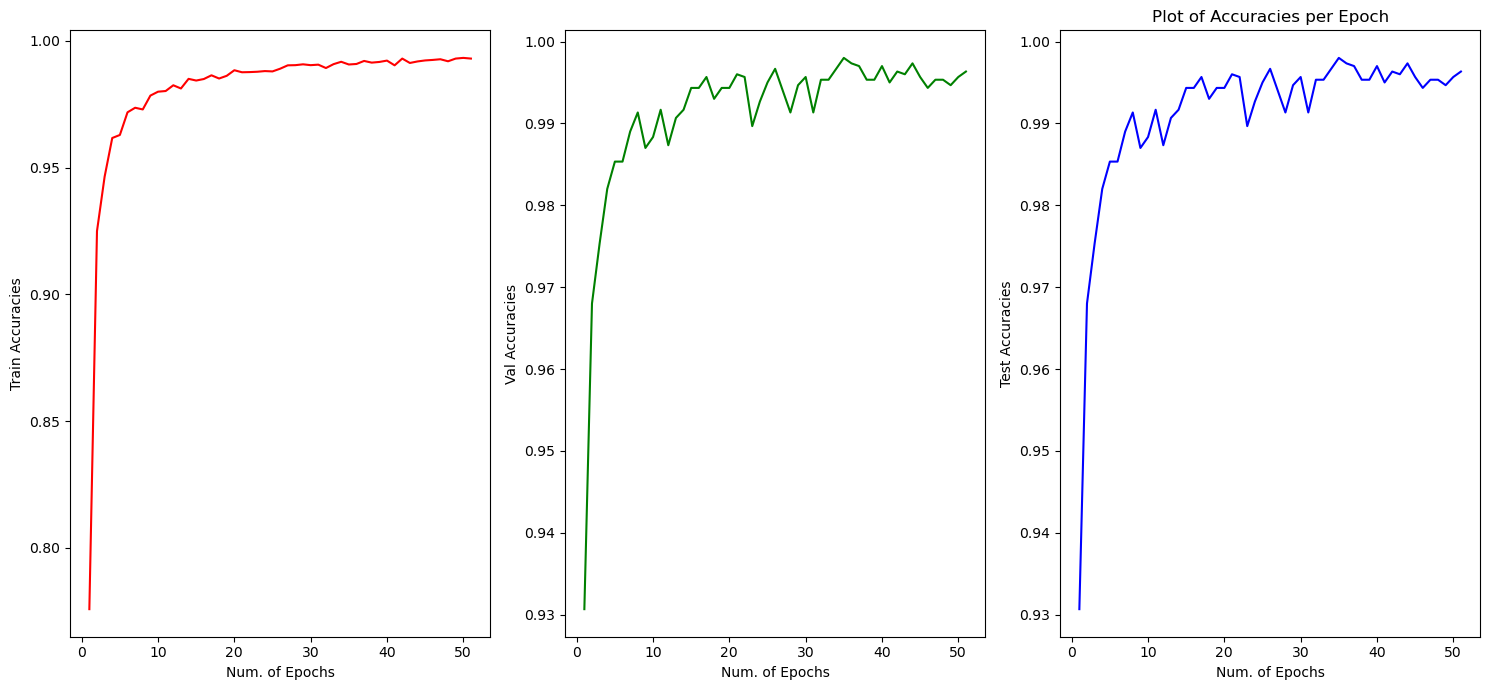

In [109]:
if __name__ ==  "__main__":
    
    fig, (axa1, axa2, axa3) = plt.subplots(1, 3)
    
    
    ya = [h.cpu().numpy() for h in train_hist[0]]
    za = [h.cpu().numpy() for h in val_hist[0]]
    wa = [h.cpu().numpy() for h in test_hist[0]]

    axa1.plot(range(1, num_epochs + 1), ya, color="r")
    axa2.plot(range(1, num_epochs + 1), za, color="g")
    axa3.plot(range(1, num_epochs + 1), wa, color="b")
    
    axa1.set_xlabel("Num. of Epochs")
    axa2.set_xlabel("Num. of Epochs")
    axa3.set_xlabel("Num. of Epochs")
    
    axa1.set_ylabel("Train Accuracies")
    axa2.set_ylabel("Val Accuracies")
    axa3.set_ylabel("Test Accuracies")
    
    plt.title("Plot of Accuracies per Epoch")
    
    fig.tight_layout(pad=5.0)
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.rcParams["figure.autolayout"] = True

    
    plt.show()
    

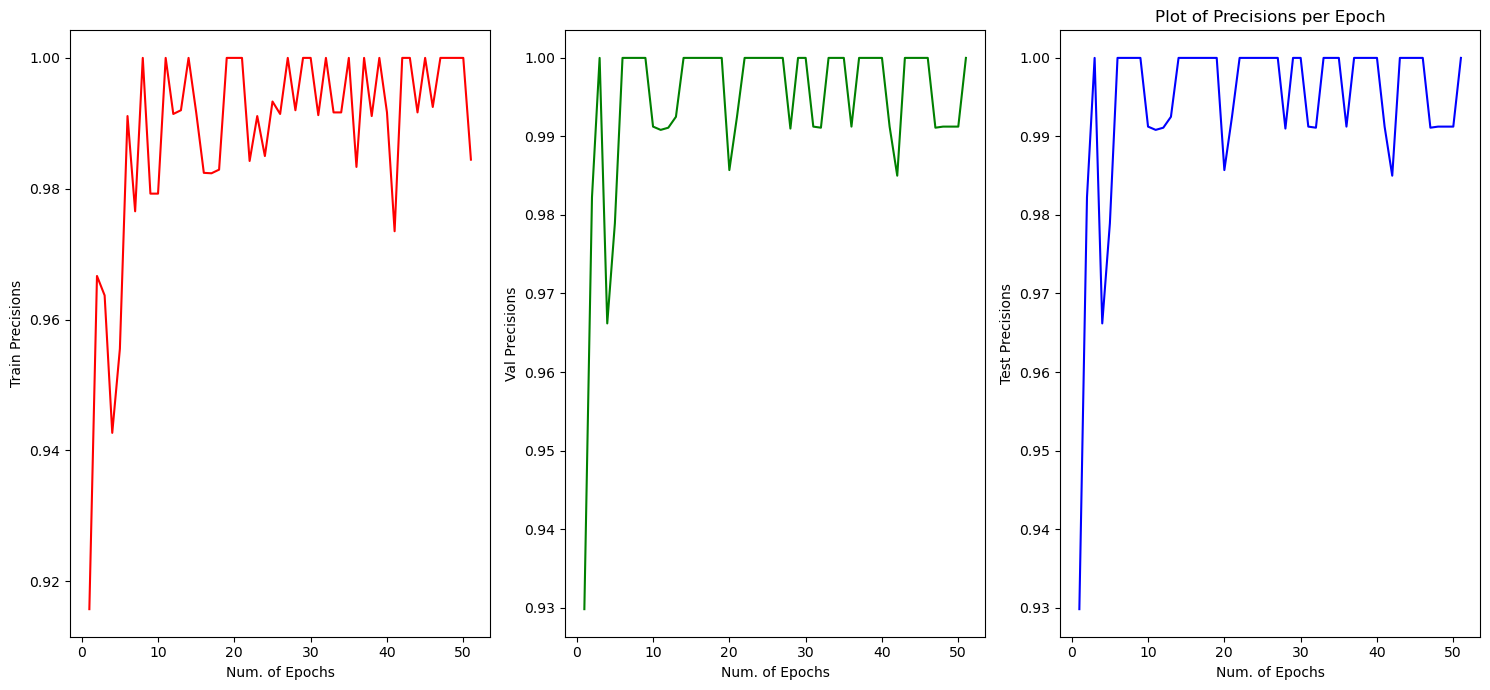

In [110]:
if __name__ ==  "__main__":
    
    fig2, (axp1, axp2, axp3) = plt.subplots(1, 3)
    
    yp = np.array(train_hist[1])
    zp = np.array(val_hist[1])
    wp = np.array(test_hist[1])

    axp1.plot(range(1, num_epochs + 1), yp, color="r")
    axp2.plot(range(1, num_epochs + 1), zp, color="g")
    axp3.plot(range(1, num_epochs + 1), wp, color="b")
    
    axp1.set_xlabel("Num. of Epochs")
    axp2.set_xlabel("Num. of Epochs")
    axp3.set_xlabel("Num. of Epochs")
    
    axp1.set_ylabel("Train Precisions")
    axp2.set_ylabel("Val Precisions")
    axp3.set_ylabel("Test Precisions")
    
    plt.title("Plot of Precisions per Epoch")
    
    fig.tight_layout(pad=5.0)
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.rcParams["figure.autolayout"] = True

    
    plt.show()

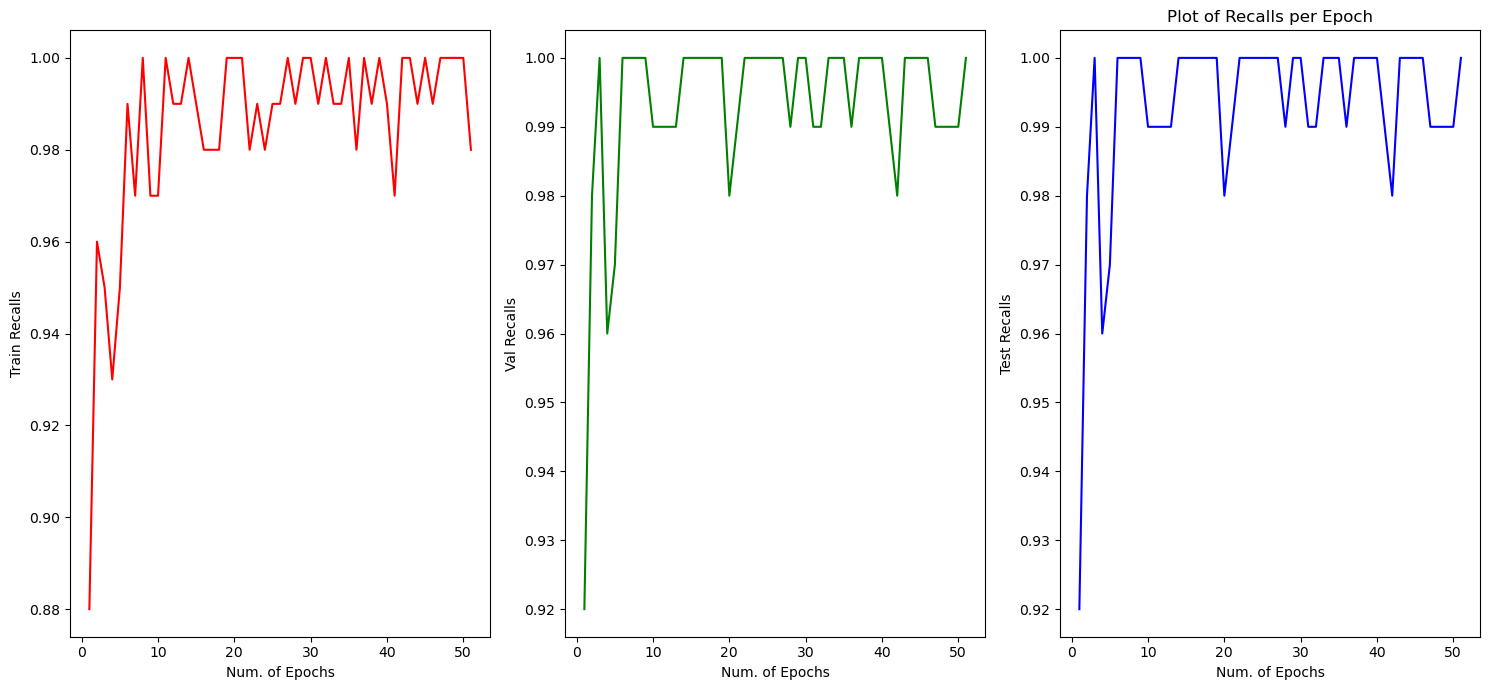

In [111]:
if __name__ ==  "__main__":
    
    fig2, (axr1, axr2, axr3) = plt.subplots(1, 3)
    
    yr = np.array(train_hist[2])
    zr = np.array(val_hist[2])
    wr = np.array(test_hist[2])

    axr1.plot(range(1, num_epochs + 1), yr, color="r")
    axr2.plot(range(1, num_epochs + 1), zr, color="g")
    axr3.plot(range(1, num_epochs + 1), wr, color="b")
    
    axr1.set_xlabel("Num. of Epochs")
    axr2.set_xlabel("Num. of Epochs")
    axr3.set_xlabel("Num. of Epochs")
    
    axr1.set_ylabel("Train Recalls")
    axr2.set_ylabel("Val Recalls")
    axr3.set_ylabel("Test Recalls")
    
    plt.title("Plot of Recalls per Epoch")
    
    fig.tight_layout(pad=5.0)
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.rcParams["figure.autolayout"] = True

    
    plt.show()

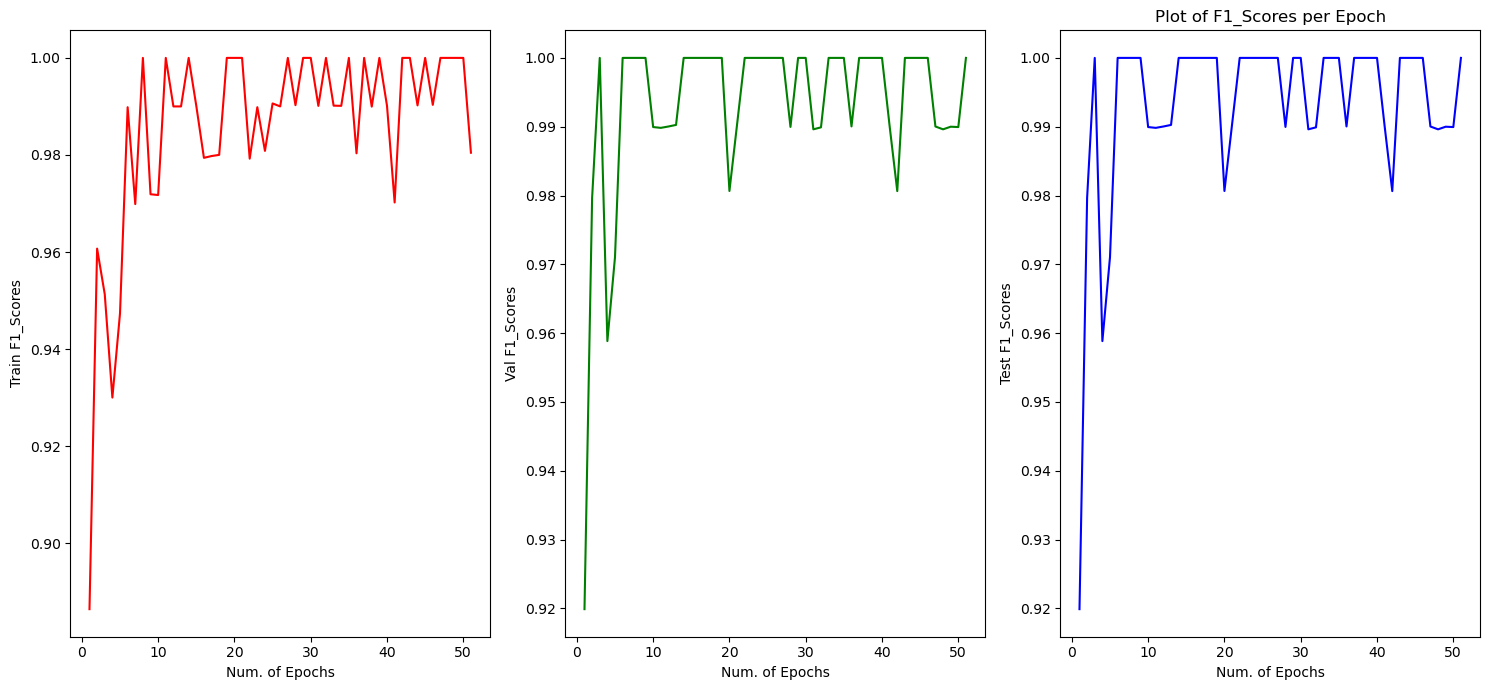

In [112]:
if __name__ ==  "__main__":
    
    fig2, (axf1, axf2, axf3) = plt.subplots(1, 3)
    
    yf = np.array(train_hist[3])
    zf = np.array(val_hist[3])
    wf = np.array(test_hist[3])

    axf1.plot(range(1, num_epochs + 1), yf, color="r")
    axf2.plot(range(1, num_epochs + 1), zf, color="g")
    axf3.plot(range(1, num_epochs + 1), wf, color="b")
    
    axf1.set_xlabel("Num. of Epochs")
    axf2.set_xlabel("Num. of Epochs")
    axf3.set_xlabel("Num. of Epochs")
    
    axf1.set_ylabel("Train F1_Scores")
    axf2.set_ylabel("Val F1_Scores")
    axf3.set_ylabel("Test F1_Scores")
    
    plt.title("Plot of F1_Scores per Epoch")
    
    fig.tight_layout(pad=5.0)
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.rcParams["figure.autolayout"] = True

    
    plt.show()

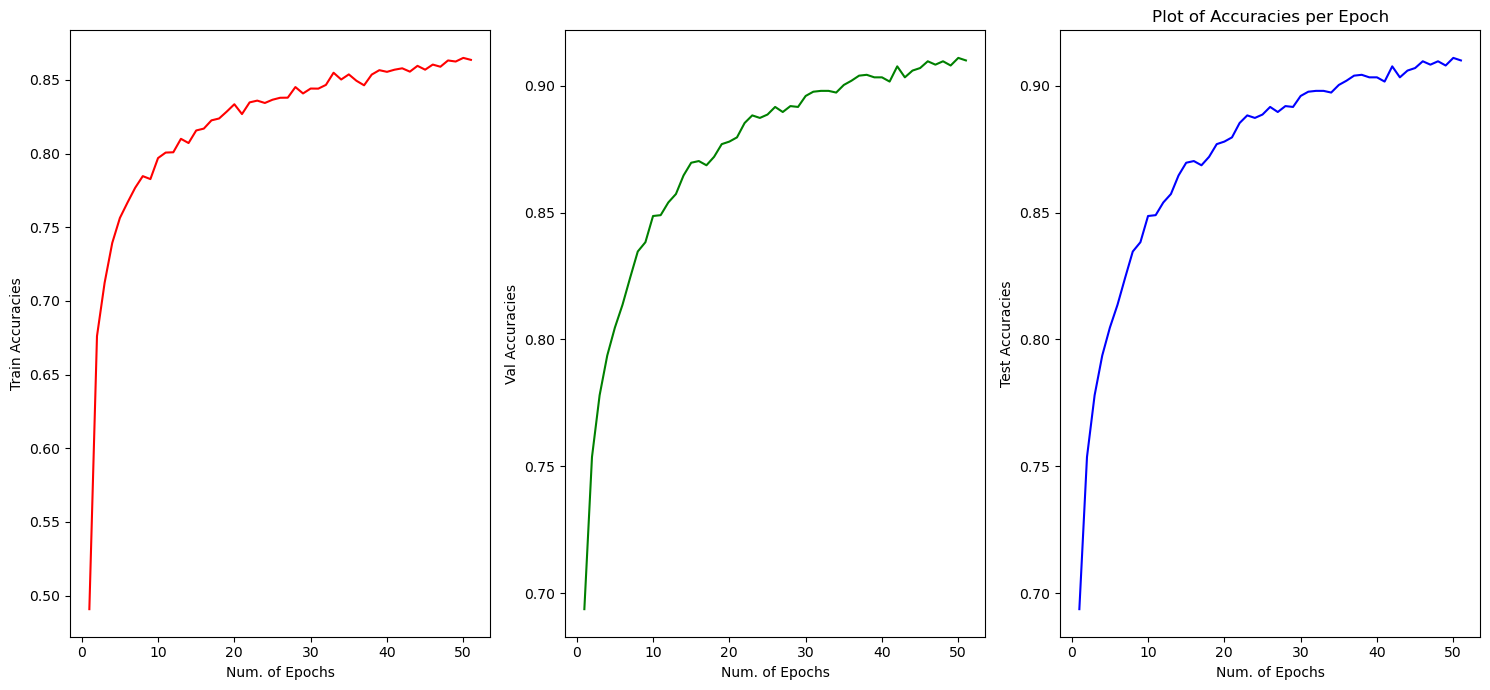

In [113]:
if __name__ ==  "__main__":
    
    fig, (axa1, axa2, axa3) = plt.subplots(1, 3)
    
    
    ya = [h.cpu().numpy() for h in train_hist2[0]]
    za = [h.cpu().numpy() for h in val_hist2[0]]
    wa = [h.cpu().numpy() for h in test_hist2[0]]

    axa1.plot(range(1, num_epochs + 1), ya, color="r")
    axa2.plot(range(1, num_epochs + 1), za, color="g")
    axa3.plot(range(1, num_epochs + 1), wa, color="b")
    
    axa1.set_xlabel("Num. of Epochs")
    axa2.set_xlabel("Num. of Epochs")
    axa3.set_xlabel("Num. of Epochs")
    
    axa1.set_ylabel("Train Accuracies")
    axa2.set_ylabel("Val Accuracies")
    axa3.set_ylabel("Test Accuracies")
    
    plt.title("Plot of Accuracies per Epoch")
    
    fig.tight_layout(pad=5.0)
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.rcParams["figure.autolayout"] = True

    
    plt.show()
    

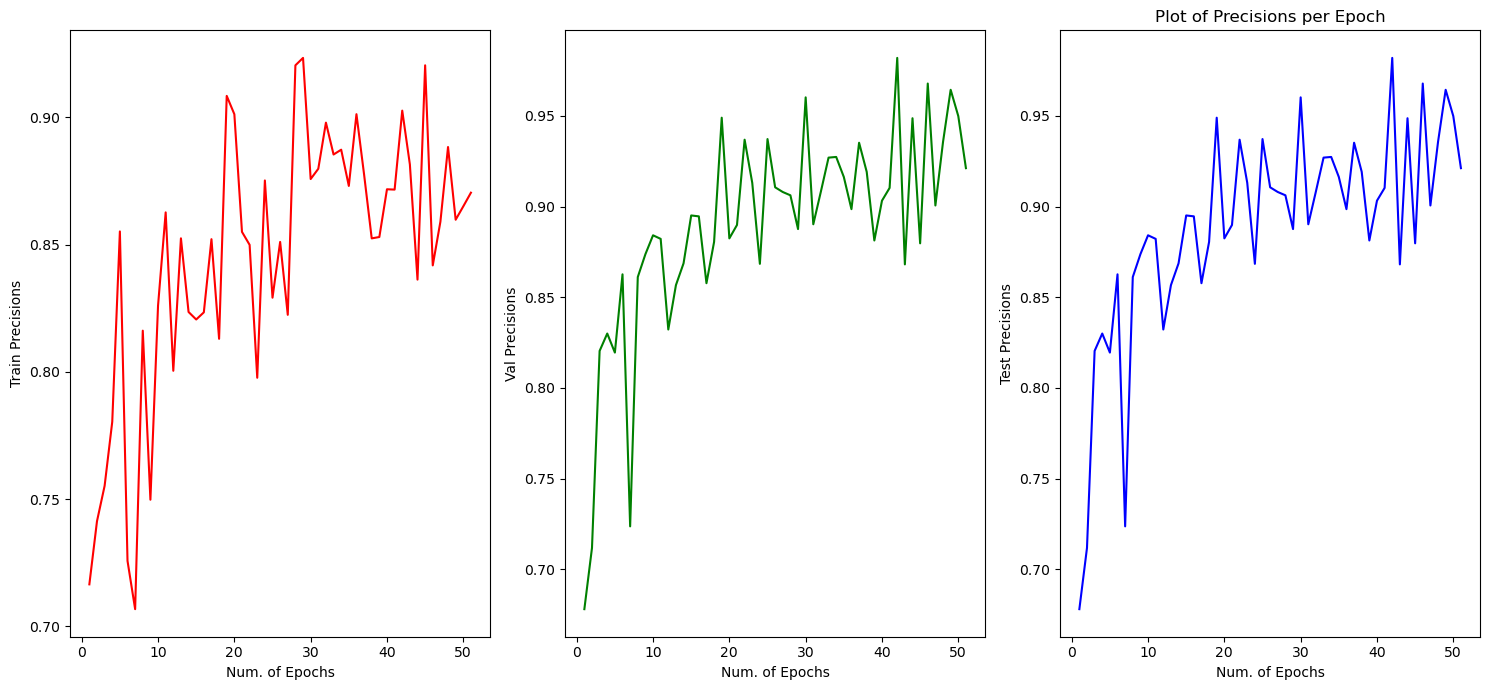

In [116]:
if __name__ ==  "__main__":
    
    fig2, (axp1, axp2, axp3) = plt.subplots(1, 3)
    
    yp = np.array(train_hist2[1])
    zp = np.array(val_hist2[1])
    wp = np.array(test_hist2[1])

    axp1.plot(range(1, num_epochs + 1), yp, color="r")
    axp2.plot(range(1, num_epochs + 1), zp, color="g")
    axp3.plot(range(1, num_epochs + 1), wp, color="b")
    
    axp1.set_xlabel("Num. of Epochs")
    axp2.set_xlabel("Num. of Epochs")
    axp3.set_xlabel("Num. of Epochs")
    
    axp1.set_ylabel("Train Precisions")
    axp2.set_ylabel("Val Precisions")
    axp3.set_ylabel("Test Precisions")
    
    plt.title("Plot of Precisions per Epoch")
    
    fig.tight_layout(pad=5.0)
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.rcParams["figure.autolayout"] = True

    
    plt.show()

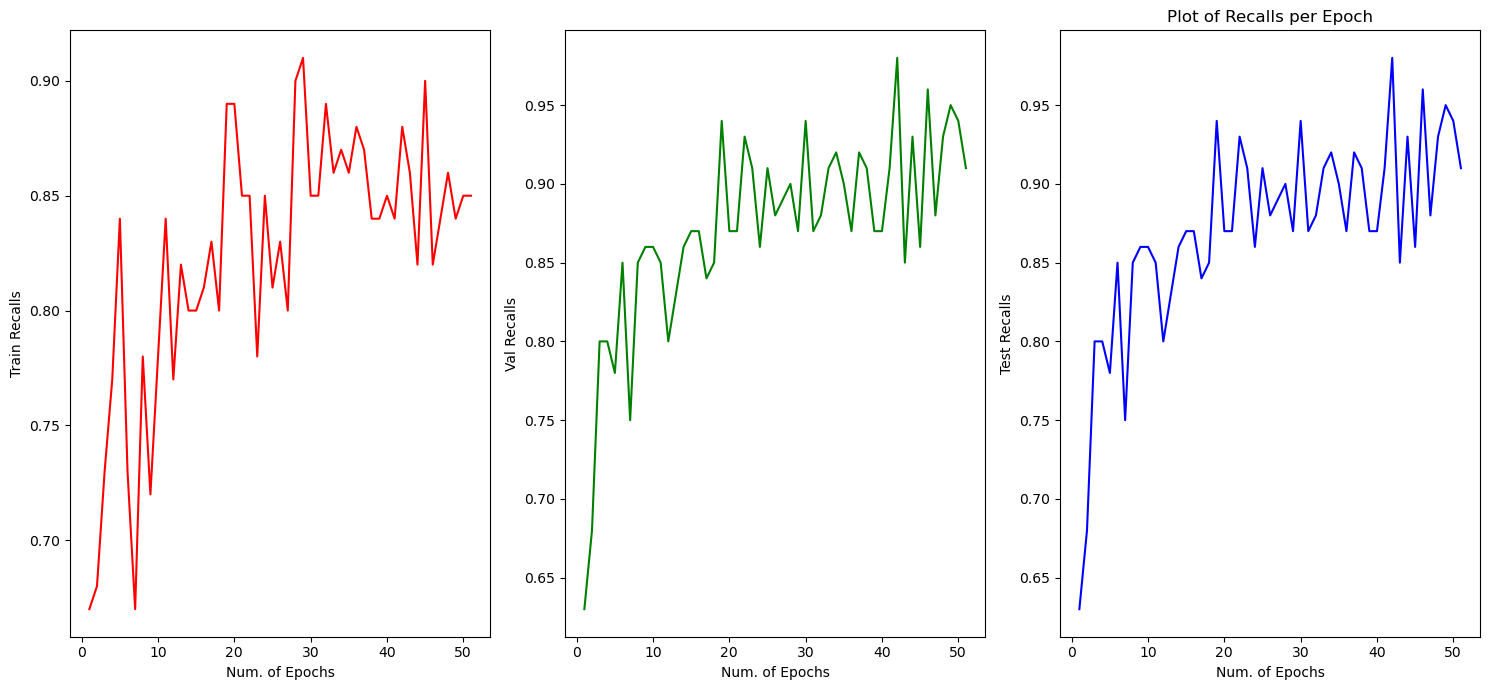

In [119]:
if __name__ ==  "__main__":
    
    fig2, (axr1, axr2, axr3) = plt.subplots(1, 3)
    
    yr = np.array(train_hist2[2])
    zr = np.array(val_hist2[2])
    wr = np.array(test_hist2[2])

    axr1.plot(range(1, num_epochs + 1), yr, color="r")
    axr2.plot(range(1, num_epochs + 1), zr, color="g")
    axr3.plot(range(1, num_epochs + 1), wr, color="b")
    
    axr1.set_xlabel("Num. of Epochs")
    axr2.set_xlabel("Num. of Epochs")
    axr3.set_xlabel("Num. of Epochs")
    
    axr1.set_ylabel("Train Recalls")
    axr2.set_ylabel("Val Recalls")
    axr3.set_ylabel("Test Recalls")
    
    plt.title("Plot of Recalls per Epoch")
    
    fig.tight_layout(pad=5.0)
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.rcParams["figure.autolayout"] = True

    
    plt.show()

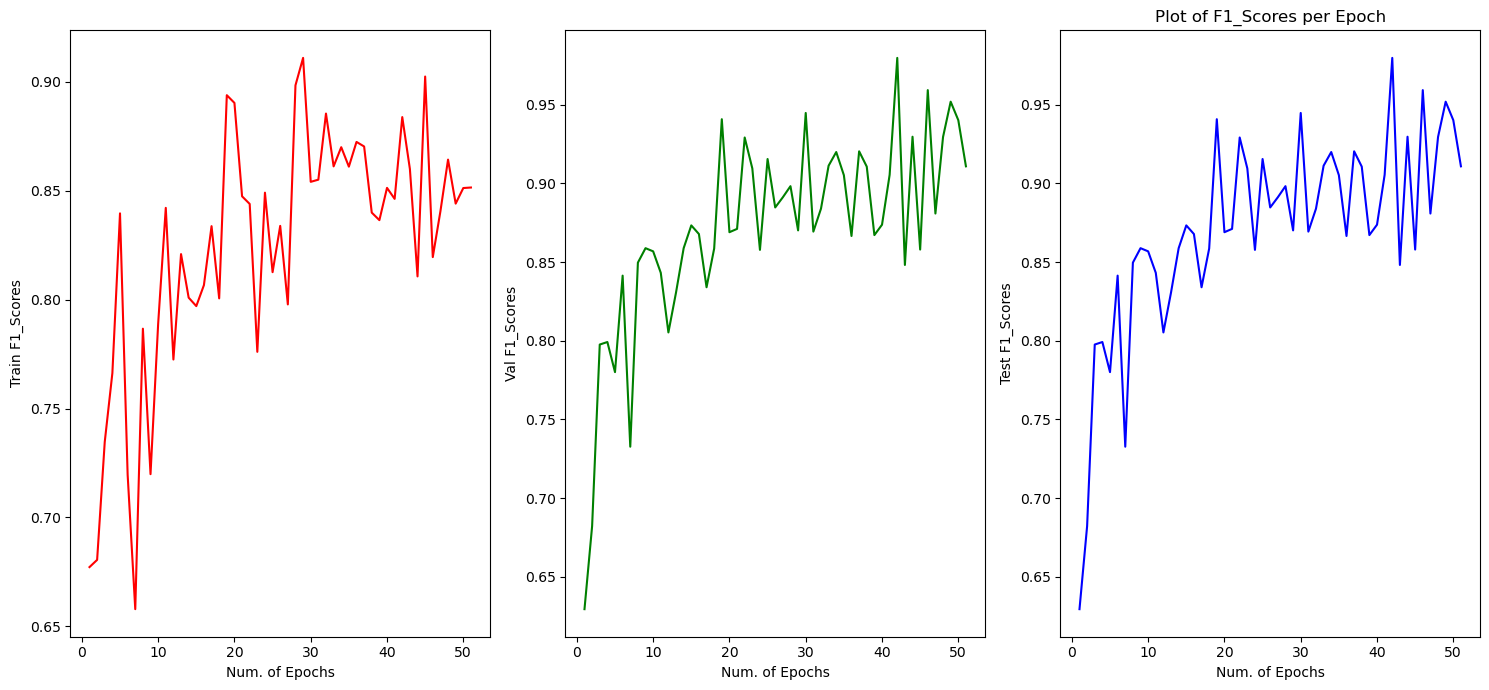

In [120]:
if __name__ ==  "__main__":
    
    fig2, (axf1, axf2, axf3) = plt.subplots(1, 3)
    
    yf = np.array(train_hist2[3])
    zf = np.array(val_hist2[3])
    wf = np.array(test_hist2[3])

    axf1.plot(range(1, num_epochs + 1), yf, color="r")
    axf2.plot(range(1, num_epochs + 1), zf, color="g")
    axf3.plot(range(1, num_epochs + 1), wf, color="b")
    
    axf1.set_xlabel("Num. of Epochs")
    axf2.set_xlabel("Num. of Epochs")
    axf3.set_xlabel("Num. of Epochs")
    
    axf1.set_ylabel("Train F1_Scores")
    axf2.set_ylabel("Val F1_Scores")
    axf3.set_ylabel("Test F1_Scores")
    
    plt.title("Plot of F1_Scores per Epoch")
    
    fig.tight_layout(pad=5.0)
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.rcParams["figure.autolayout"] = True

    
    plt.show()